In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

np.random.seed(42)

import tensorflow as tf 
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
 

In [24]:
mass = pd.read_pickle('./data/03_dummy_df.pickle') 
sent = pd.read_pickle('./data/03_mass_notes_sentiment_analysis.pickle')

In [25]:
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,labor_wage_dispute,land_farm_issue,police_brutality,political_behavior_process,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,target
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1,0,0,1,0,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]"
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1,0,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]"
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1,0,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]"
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,1,0,0,0,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]"
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1,0,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]"


In [26]:
mass.shape

(15225, 228)

In [27]:
sent.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,price increases_tax_policy,removal_of_politician,social_restrictions,start_date,end_date,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,0,1990-01-15,1990-01-15,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,0,1990-06-25,1990-06-25,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,0,1990-07-01,1990-07-01,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,0,1990-07-12,1990-09-06,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,0,1990-08-14,1990-08-15,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [28]:
sent = sent[['notes_clean', 'neg', 'neu', 'pos', 'compound']]
sent.head()

,notes_clean,neg,neu,pos,compound
0,canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,"the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [29]:
sent.shape

(15179, 5)

In [30]:
mass.dropna(subset=['notes'], inplace=True)
mass.shape

(15179, 228)

In [31]:
mass = pd.concat([mass, sent], axis=1, join='inner')
mass.head()

,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,removal_of_politician,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,0,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,0,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,0,0,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,0,0,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,0,0,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267


In [101]:
mass['protest_duration'] = mass['end_date'] - mass['start_date']
mass['protest_duration'] = mass['protest_duration'].dt.days + 1
mass['protest_duration']

0         1
1         1
2         1
3        57
4         2
         ..
15220     3
15221    26
15222     1
15223     1
15224     1
Name: protest_duration, Length: 15179, dtype: int64

In [102]:
# save 
mass.to_csv('./data/mass_mobile.csv')

In [107]:
list(mass.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'coun

## Multilabel Classification using Neural Network 

In [108]:
X = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
      'end_date', 'target', 'arrests','accomodation','beatings','crowddispersal','ignore','killings','shootings'])
#y = mass['target']
y = np.array(mass[['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings']])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [111]:
n_input = Z_train.shape[1]
n_output = y.shape[1]
print(f'Number of inputs: {Z_train.shape[1]}')
print(f'Number of outputs: {y.shape[1]}')

Number of inputs: 211
Number of outputs: 7


In [112]:
model = Sequential()
model.add(Dense(n_input, input_dim=n_input, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_output, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(Z_train, y_train)

356/356 [==============================] - 1s 656us/step - loss: 0.4250 - accuracy: 0.4734


In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 211)               44732     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1484      
Total params: 46,216
Trainable params: 46,216
Non-trainable params: 0
_________________________________________________________________


In [114]:
pred = model.predict(Z_test)
y_pred = pred.round()
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [115]:
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [116]:
metrics.r2_score(y_test, y_pred)


-0.052922631458553755

In [117]:
metrics.accuracy_score(y_test, y_pred)

0.5054018445322793

In [118]:
model.evaluate(Z_test, y_test)

119/119 [==============================] - 0s 433us/step - loss: 0.3122 - accuracy: 0.5889


[0.31215575337409973, 0.5889328122138977]

In [119]:
history = model.fit(Z_train, 
                   y_train, 
                   validation_data=(Z_test, y_test), 
                   epochs=50, 
                   batch_size=None, 
                   verbose=2)

Epoch 1/50
356/356 - 0s - loss: 0.2949 - accuracy: 0.6065 - val_loss: 0.3091 - val_accuracy: 0.5931
Epoch 2/50
356/356 - 0s - loss: 0.2855 - accuracy: 0.6122 - val_loss: 0.3072 - val_accuracy: 0.5963
Epoch 3/50
356/356 - 0s - loss: 0.2789 - accuracy: 0.6176 - val_loss: 0.3080 - val_accuracy: 0.5947
Epoch 4/50
356/356 - 0s - loss: 0.2741 - accuracy: 0.6214 - val_loss: 0.3083 - val_accuracy: 0.5995
Epoch 5/50
356/356 - 0s - loss: 0.2691 - accuracy: 0.6247 - val_loss: 0.3088 - val_accuracy: 0.6021
Epoch 6/50
356/356 - 0s - loss: 0.2650 - accuracy: 0.6271 - val_loss: 0.3096 - val_accuracy: 0.5971
Epoch 7/50
356/356 - 0s - loss: 0.2597 - accuracy: 0.6344 - val_loss: 0.3123 - val_accuracy: 0.5960
Epoch 8/50
356/356 - 0s - loss: 0.2556 - accuracy: 0.6362 - val_loss: 0.3135 - val_accuracy: 0.6037
Epoch 9/50
356/356 - 0s - loss: 0.2522 - accuracy: 0.6398 - val_loss: 0.3131 - val_accuracy: 0.5968
Epoch 10/50
356/356 - 0s - loss: 0.2472 - accuracy: 0.6442 - val_loss: 0.3184 - val_accuracy: 0.5879

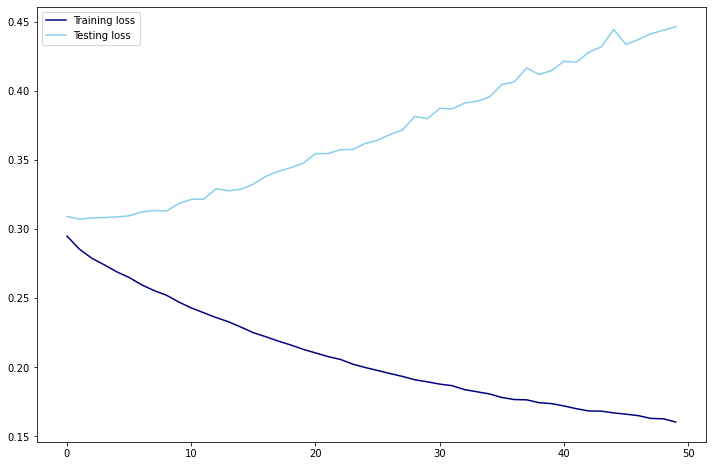

In [120]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();